## About Data: 
Fuel Economy Data This information is provided by the U.S. Environmental Protection Agency, OFFICE of
ENERGY EFFICIENCY & RENEWABLE ENERGY 
https://www.fueleconomy.gov/feg/download.shtml



a. What is the unit of measure for engine displacement?
   Liters<br> 
b. Match the meaning for each feature.
   * Stnd : Vehicle emissions standard code 
   * Cyl : Number of Cylinders in the engine 
   * Trans : Transmission Type 
   * Drv : Drive Axle Type 

## Skills and packages needed for this activity

* functions used: read_excel(),  isnull(),  columns(), rename(), all(), drop(), convert_numeric(), split(), apply(), append(), index(), copy(), value_counts(), astype(), head(), str.extract(), str.contains()
groupby(), merge(), nunique(), mean(), contains(), isnull(), sum(), duplicated(), value_counts(), dropna() 
* parameters used: axis = 1, inplace = True
* attributes used: shape, dtypes,
* general skills: chaining, column selection with loc and iloc, broadcasting, chaining, boolean mask, regular expression, lambda function
* packages: pandas, numpy, altair


In [148]:
import numpy as np

### Questions
1. For all of the models that were produced in 2008 that are still being produced now, how much has the mpg improved?
2. Which vehicle improved the most? 


### First we have to clean the data.

### 2: Import and clean data  
##### Import the packages and load data

In [4]:
import pandas as pd
import numpy as np

df_08 = pd.read_csv('file_2008.csv')
df_18 = pd.read_csv('file_2018.csv')
# df_08=pd.read_excel('https://www.fueleconomy.gov/feg/EPAGreenGuide/xls/all_alpha_08.xls')
# df_18=pd.read_excel('https://www.fueleconomy.gov/feg/EPAGreenGuide/xls/all_alpha_18.xlsx')

##### Print the shape and the heads of both dataframes

In [16]:
#2008
print(df_08.shape)
df_08.head()


(2404, 18)


,Model,Displ,Cyl,Trans,Drive,Fuel,Sales Area,Stnd,Underhood ID,Veh Class,Air Pollution Score,FE Calc Appr,City MPG,Hwy MPG,Cmb MPG,Unadj Cmb MPG,Greenhouse Gas Score,SmartWay
0,ACURA MDX,3.7,(6 cyl),Auto-S5,4WD,Gasoline,CA,U2,8HNXT03.7PKR,SUV,7,Drv,15,20,17,22.0527,4,no
1,ACURA MDX,3.7,(6 cyl),Auto-S5,4WD,Gasoline,FA,B5,8HNXT03.7PKR,SUV,6,Drv,15,20,17,22.0527,4,no
2,ACURA RDX,2.3,(4 cyl),Auto-S5,4WD,Gasoline,CA,U2,8HNXT02.3DKR,SUV,7,Drv,17,22,19,24.1745,5,no
3,ACURA RDX,2.3,(4 cyl),Auto-S5,4WD,Gasoline,FA,B5,8HNXT02.3DKR,SUV,6,Drv,17,22,19,24.1745,5,no
4,ACURA RL,3.5,(6 cyl),Auto-S5,4WD,Gasoline,CA,U2,8HNXV03.5HKR,midsize car,7,Drv,16,24,19,24.5629,5,no


In [17]:
#2018
# your work here
print(df_18.shape)
df_18.head()

(2713, 18)


,Model,Displ,Cyl,Trans,Drive,Fuel,Cert Region,Stnd,Stnd Description,Underhood ID,Veh Class,Air Pollution Score,City MPG,Hwy MPG,Cmb MPG,Greenhouse Gas Score,SmartWay,Comb CO2
0,ACURA ILX,2.4,4.0,AMS-8,2WD,Gasoline,CA,L3ULEV125,California LEV-III ULEV125,JHNXV02.4NH3,small car,3,25,35,29,6,No,309
1,ACURA ILX,2.4,4.0,AMS-8,2WD,Gasoline,FA,T3B125,Federal Tier 3 Bin 125,JHNXV02.4NH3,small car,3,25,35,29,6,No,309
2,ACURA MDX,3.0,6.0,AMS-7,4WD,Gasoline,CA,L3ULEV125,California LEV-III ULEV125,JHNXV03.08H3,small SUV,3,26,27,27,6,No,330
3,ACURA MDX,3.0,6.0,AMS-7,4WD,Gasoline,FA,T3B125,Federal Tier 3 Bin 125,JHNXV03.08H3,small SUV,3,26,27,27,6,No,330
4,ACURA MDX,3.5,6.0,SemiAuto-9,2WD,Gasoline,CA,L3ULEV125,California LEV-III ULEV125,JHNXV03.5RH3,small SUV,3,19,27,22,4,No,404


##### print column labels

In [19]:
print(df_08.columns)
print(df_18.columns)



Index(['Model', 'Displ', 'Cyl', 'Trans', 'Drive', 'Fuel', 'Sales Area', 'Stnd',
       'Underhood ID', 'Veh Class', 'Air Pollution Score', 'FE Calc Appr',
       'City MPG', 'Hwy MPG', 'Cmb MPG', 'Unadj Cmb MPG',
       'Greenhouse Gas Score', 'SmartWay'],
      dtype='object')
Index(['Model', 'Displ', 'Cyl', 'Trans', 'Drive', 'Fuel', 'Cert Region',
       'Stnd', 'Stnd Description', 'Underhood ID', 'Veh Class',
       'Air Pollution Score', 'City MPG', 'Hwy MPG', 'Cmb MPG',
       'Greenhouse Gas Score', 'SmartWay', 'Comb CO2'],
      dtype='object')


##### Consider which rows you want to use.

In [20]:
df_18=df_18[df_18['Cert Region']=="CA"]
df_08=df_08[df_08['Sales Area']=="CA"]


##### Take out features that are not present in both datasets or aren't relevant to our questions. 


In [21]:
#find columns that are in both datasets
cols_both = list(set(df_08.columns) & set(df_18.columns))
cols_both

['Underhood ID',
 'Displ',
 'SmartWay',
 'Stnd',
 'Cmb MPG',
 'Veh Class',
 'City MPG',
 'Trans',
 'Hwy MPG',
 'Drive',
 'Greenhouse Gas Score',
 'Air Pollution Score',
 'Model',
 'Cyl',
 'Fuel']

In [22]:
df_08 = df_08[cols_both]
df_18 = df_18[cols_both]

In [23]:
# drop columns that we are not interested in from 2008 dataset
df_08.drop(['Stnd', 'Underhood ID'], axis=1, inplace=True)

# confirm changes by checking head
df_08.head(1)

,Displ,SmartWay,Cmb MPG,Veh Class,City MPG,Trans,Hwy MPG,Drive,Greenhouse Gas Score,Air Pollution Score,Model,Cyl,Fuel
0,3.7,no,17,SUV,15,Auto-S5,20,4WD,4,7,ACURA MDX,(6 cyl),Gasoline


##### Drop the same columns from 2018 dataset

In [26]:
# drop columns from 2018 dataset
# your work here
df_18.drop(['Stnd', 'Underhood ID'], axis=1, inplace=True)

# confirm changes
df_18.head(1)

,Displ,SmartWay,Cmb MPG,Veh Class,City MPG,Trans,Hwy MPG,Drive,Greenhouse Gas Score,Air Pollution Score,Model,Cyl,Fuel
0,2.4,No,29,small car,25,AMS-8,35,2WD,6,3,ACURA ILX,4.0,Gasoline



##### Examine rows in each dataset that contain missing values.

In [73]:
# check if any of columns in datasets have null values
df_08[df_08.isnull().any(axis=1)]
df_18[df_18.isnull().any(axis=1)].count()
df_18.count()


Displ                   1317
SmartWay                1341
Cmb MPG                 1341
Veh Class               1341
City MPG                1341
Trans                   1341
Hwy MPG                 1341
Drive                   1341
Greenhouse Gas Score    1341
Air Pollution Score     1341
Model                   1341
Cyl                     1317
Fuel                    1341
dtype: int64

In [93]:
# which rows are they? 
df_08[df_08.isnull().any(axis=1)]


,Displ,SmartWay,Cmb MPG,Veh Class,City MPG,Trans,Hwy MPG,Drive,Greenhouse Gas Score,Air Pollution Score,Model,Cyl,Fuel


In [92]:
# handle rows with null values
# your work here
df_08 = df_08.dropna()
df_18 = df_18.dropna()



##### Total duplicated data rows from both datasets

In [96]:
df_08.duplicated().sum(), df_18.duplicated().sum()

(0, 0)

##### Drop duplicated data rows from both datasets. Look up the drop_duplicates function.

In [95]:
df_08 = df_08.drop_duplicates()
df_18 = df_18.drop_duplicates()


In [97]:
df_18.duplicated().sum()   ,   df_08.duplicated().sum()  

(0, 0)

##### Attempt to find the mean of the City MPG column. Why doesn't it work? Investigate using functions such as dtype, nunique, ...


In [149]:
df_08v2 = df_08[np.logical_not(df_08["City MPG"].str.contains('/'))]
df_08v2

,Displ,SmartWay,Cmb MPG,Veh Class,City MPG,Trans,Hwy MPG,Drive,Greenhouse Gas Score,Air Pollution Score,Model,Cyl,Fuel
0,3.7,no,17,SUV,15,Auto-S5,20,4WD,4,7,ACURA MDX,(6 cyl),Gasoline
2,2.3,no,19,SUV,17,Auto-S5,22,4WD,5,7,ACURA RDX,(4 cyl),Gasoline
4,3.5,no,19,midsize car,16,Auto-S5,24,4WD,5,7,ACURA RL,(6 cyl),Gasoline
6,3.2,yes,21,midsize car,18,Auto-S5,26,2WD,6,7,ACURA TL,(6 cyl),Gasoline
7,3.5,yes,20,midsize car,17,Auto-S5,26,2WD,6,7,ACURA TL,(6 cyl),Gasoline
8,3.5,yes,21,midsize car,18,Man-6,27,2WD,6,7,ACURA TL,(6 cyl),Gasoline
14,2.4,no,22,small car,19,Man-6,28,2WD,6,6,ACURA TSX,(4 cyl),Gasoline
15,2.4,yes,23,small car,20,Auto-S5,28,2WD,7,6,ACURA TSX,(4 cyl),Gasoline
18,5.9,no,12,small car,10,Man-6,16,2WD,0,6,ASTON MARTIN DB9,(12 cyl),Gasoline
19,5.9,no,13,small car,11,Auto-S6,18,2WD,1,6,ASTON MARTIN DB9,(12 cyl),Gasoline


##### Notice the values in row 1550 below to help figure out the issue.

In [0]:
df_08.iloc[1550] 

##### All vehicles with more than one fuel type, like the one above (it lists ethanol AND gas) will have a string that holds two values in each MPG column. One is for ethanol and one for gas. What are some options for handling this?

##### Let's make a separate row for each kind of fuel.

##### First make a dataframe of the 2008 cars with 2 fuels.

In [150]:
# First, let's get all the cars listed with 2 fuels in 2008
F2_08 = df_08[df_08['Fuel'].str.contains('/')]
F2_08.head(3)

,Displ,SmartWay,Cmb MPG,Veh Class,City MPG,Trans,Hwy MPG,Drive,Greenhouse Gas Score,Air Pollution Score,Model,Cyl,Fuel
1550,3.0,no,15/21,small car,13/18,Auto-L7,19/25,2WD,7/6,6/4,MERCEDES-BENZ C300,(6 cyl),ethanol/gas


##### Take each row and split them into two new rows - one with values for the first fuel type (values before the "/"), and the other with values for the second fuel type (values after the "/"). Let's separate them into two dataframes!<br>


In [151]:
# for 2008
# create two copies of the 2008 hybrids dataframe
df1 = F2_08.copy()  # data on first fuel type of each vehicle
df2 = F2_08.copy()  # data on second fuel type of each vehicle


In [152]:
# columns to split by "/"
split_columns = ['Fuel', 'Air Pollution Score', 'City MPG', 'Hwy MPG', 'Cmb MPG', 'Greenhouse Gas Score']

# apply split function to each column of each dataframe copy
for c in split_columns:
    df1[c] = df1[c].apply(lambda x: x.split("/")[0])
    df2[c] = df2[c].apply(lambda x: x.split("/")[1])

In [153]:
# combine dataframes to add to the original dataframe
new_rows = df1.append(df2)

##### Drop the original rows and add in our newly separated rows

In [154]:
# drop the original rows
df_08.drop(F2_08.index, inplace=True)

# add in our newly separated rows
df_08 = df_08.append(new_rows, ignore_index=True)

In [155]:
# check that all the original rows with "/"s are gone
df_08[df_08['Fuel'].str.contains('/')]

,Displ,SmartWay,Cmb MPG,Veh Class,City MPG,Trans,Hwy MPG,Drive,Greenhouse Gas Score,Air Pollution Score,Model,Cyl,Fuel


In [169]:
df_08.shape

(987, 13)

##### Repeat the process for dataset 2018

In [158]:
F2_18 = df_18[df_18['Fuel'].str.contains('/')]

df1 = F2_18.copy()
df2 = F2_18.copy()

In [159]:
# apply split function to each column of each dataframe copy

# list of columns to split
split_columns = ['Fuel','City MPG', 'Hwy MPG','Cmb MPG']

# apply split function to each column of each dataframe copy
for c in split_columns:
    df1[c] = df1[c].apply(lambda x: x.split("/")[0])
    df2[c] = df2[c].apply(lambda x: x.split("/")[1])


In [160]:
# append the two dataframes
new_rows = df1.append(df2)

# drop each hybrid row from the original 2018 dataframe
# do this by using Pandas drop function
df_18.drop(F2_18.index, inplace=True) # drop original one 

# append new_rows to df_18  
df_18 = df_18.append(new_rows,ignore_index=True)

In [161]:
# check that all the original hybrid rows with "/"s are gone
df_18[df_18['Fuel'].str.contains('/')]

,Displ,SmartWay,Cmb MPG,Veh Class,City MPG,Trans,Hwy MPG,Drive,Greenhouse Gas Score,Air Pollution Score,Model,Cyl,Fuel


##### Finally, fix city mpg, hwy mpg, and cmb mpg datatypes. Change them from strings to floats.


In [171]:
df_08.dtypes

Displ                   float64
SmartWay                 object
Cmb MPG                  object
Veh Class                object
City MPG                 object
Trans                    object
Hwy MPG                  object
Drive                    object
Greenhouse Gas Score     object
Air Pollution Score      object
Model                    object
Cyl                      object
Fuel                     object
dtype: object

In [172]:
df_18.dtypes

Displ                   float64
SmartWay                 object
Cmb MPG                  object
Veh Class                object
City MPG                 object
Trans                    object
Hwy MPG                  object
Drive                    object
Greenhouse Gas Score      int64
Air Pollution Score       int64
Model                    object
Cyl                     float64
Fuel                     object
dtype: object

In [178]:
# your work here
df_08 = df_08.astype({"Cmb MPG": float, "City MPG": float,  "Hwy MPG": float })
df_18 = df_18.astype({"Cmb MPG": float, "City MPG": float,  "Hwy MPG": float })

In [180]:
df_08.dtypes

Displ                   float64
SmartWay                 object
Cmb MPG                 float64
Veh Class                object
City MPG                float64
Trans                    object
Hwy MPG                 float64
Drive                    object
Greenhouse Gas Score     object
Air Pollution Score      object
Model                    object
Cyl                      object
Fuel                     object
dtype: object

### 3: Fuel economy questions.

##### How much have vehicle classes improved in fuel economy (increased in mpg)?  

Let's look at the average fuel economy for each vehicle class for both years.

In [181]:
#2008
veh_08 = df_08.groupby(['Veh Class'])['Cmb MPG'].mean()
veh_08


Veh Class
SUV              18.471429
large car        18.509091
midsize car      21.601449
minivan          19.117647
pickup           16.277108
small car        21.105105
station wagon    22.366667
van              14.952381
Name: Cmb MPG, dtype: float64

In [182]:
# 2018
# your work here
veh_18 = df_18.groupby(['Veh Class'])['Cmb MPG'].mean()
veh_18

Veh Class
large car          24.431507
midsize car        30.169725
minivan            27.166667
pickup             18.250000
small SUV          24.333333
small car          25.673759
special purpose    19.705882
standard SUV       19.405405
station wagon      30.054545
van                16.000000
Name: Cmb MPG, dtype: float64

In [184]:
# how much they've increased by for each vehicle class
# your work here
veh_18 - veh_08


Veh Class
SUV                     NaN
large car          5.922416
midsize car        8.568275
minivan            8.049020
pickup             1.972892
small SUV               NaN
small car          4.568654
special purpose         NaN
standard SUV            NaN
station wagon      7.687879
van                1.047619
Name: Cmb MPG, dtype: float64

##### For all of the models that were produced in 2008 that are still being produced now, how much has the mpg improved?


##### Rename the 2008 columns to prepare to merge dataframes into one.

In [185]:
# rename 2008 columns
df_08.rename(columns=lambda x: x[:10]+"_2008", inplace=True)

In [186]:
df_08.head(2)

,Displ_2008,SmartWay_2008,Cmb MPG_2008,Veh Class_2008,City MPG_2008,Trans_2008,Hwy MPG_2008,Drive_2008,Greenhouse_2008,Air Pollut_2008,Model_2008,Cyl_2008,Fuel_2008
0,3.7,no,17.0,SUV,15.0,Auto-S5,20.0,4WD,4,7,ACURA MDX,(6 cyl),Gasoline
1,2.3,no,19.0,SUV,17.0,Auto-S5,22.0,4WD,5,7,ACURA RDX,(4 cyl),Gasoline


##### Merge the datasets.

In [187]:

df_combined = pd.merge(df_08,df_18,left_on='Model_2008', right_on='Model', how='inner')


In [188]:
# view to check merge
df_combined.head()

,Displ_2008,SmartWay_2008,Cmb MPG_2008,Veh Class_2008,City MPG_2008,Trans_2008,Hwy MPG_2008,Drive_2008,Greenhouse_2008,Air Pollut_2008,...,Veh Class,City MPG,Trans,Hwy MPG,Drive,Greenhouse Gas Score,Air Pollution Score,Model,Cyl,Fuel
0,3.7,no,17.0,SUV,15.0,Auto-S5,20.0,4WD,4,7,...,small SUV,26.0,AMS-7,27.0,4WD,6,3,ACURA MDX,6.0,Gasoline
1,3.7,no,17.0,SUV,15.0,Auto-S5,20.0,4WD,4,7,...,small SUV,19.0,SemiAuto-9,27.0,2WD,4,3,ACURA MDX,6.0,Gasoline
2,3.7,no,17.0,SUV,15.0,Auto-S5,20.0,4WD,4,7,...,small SUV,20.0,SemiAuto-9,27.0,2WD,5,3,ACURA MDX,6.0,Gasoline
3,3.7,no,17.0,SUV,15.0,Auto-S5,20.0,4WD,4,7,...,small SUV,18.0,SemiAuto-9,26.0,4WD,4,3,ACURA MDX,6.0,Gasoline
4,3.7,no,17.0,SUV,15.0,Auto-S5,20.0,4WD,4,7,...,small SUV,19.0,SemiAuto-9,26.0,4WD,4,3,ACURA MDX,6.0,Gasoline


##### Create a new dataframe, model_mpg, that contain the mean combined mpg values in 2008 and 2018 for each model. To do this, group by model and find the mean cmb_mpg_2008 and mean cmb_mpg for each.


In [189]:
model_mpg = df_combined.groupby('Model').mean()[['Cmb MPG_2008', 'Cmb MPG']]

In [190]:
model_mpg.head()

,Cmb MPG_2008,Cmb MPG
Model,,
ACURA MDX,17.000000,23.000000
ACURA RDX,19.000000,22.500000
AUDI A3,23.333333,28.000000
AUDI A4,21.000000,27.000000
AUDI A6,19.666667,25.666667


##### Create a new column, mpg_change, with the change in mpg from 2008 to 2018. 



In [196]:
model_mpg["mpg_change"] = model_mpg['Cmb MPG'] - model_mpg['Cmb MPG_2008']

In [197]:
model_mpg.head()

,Cmb MPG_2008,Cmb MPG,mpg_change
Model,,,
ACURA MDX,17.000000,23.000000,6.000000
ACURA RDX,19.000000,22.500000,3.500000
AUDI A3,23.333333,28.000000,4.666667
AUDI A4,21.000000,27.000000,6.000000
AUDI A6,19.666667,25.666667,6.000000


We can see the mpg change through mpg_change column above. Every vehicle varies . 

##### Which vehicle improved the most? Find the max mpg change, and then use query or indexing to see what model it is!

In [204]:
model_mpg["mpg_change"].idxmax()

'CHEVROLET Malibu'

### 4: Exploring with Visuals

#####  Make a scatter plot of Cmb MPG_2008 and  Cmb MPG . The plot has been done for you, but look at altair documentation to figure out how to add a title.

In [205]:
# add title
import altair as alt
from vega_datasets import data
alt.renderers.enable('notebook')

df_combined_e = df_combined[df_combined['Veh Class']== 'small car']
df_combined_e.head()




,Displ_2008,SmartWay_2008,Cmb MPG_2008,Veh Class_2008,City MPG_2008,Trans_2008,Hwy MPG_2008,Drive_2008,Greenhouse_2008,Air Pollut_2008,...,Veh Class,City MPG,Trans,Hwy MPG,Drive,Greenhouse Gas Score,Air Pollution Score,Model,Cyl,Fuel
7,2.0,yes,24.0,station wagon,21.0,Man-6,29.0,2WD,7,7,...,small car,24.0,AMS-6,31.0,4WD,6,7,AUDI A3,4.0,Gasoline
8,2.0,yes,24.0,station wagon,21.0,Man-6,29.0,2WD,7,7,...,small car,26.0,AMS-7,35.0,2WD,6,7,AUDI A3,4.0,Gasoline
9,2.0,yes,25.0,station wagon,22.0,Auto-S6,29.0,2WD,7,7,...,small car,24.0,AMS-6,31.0,4WD,6,7,AUDI A3,4.0,Gasoline
10,2.0,yes,25.0,station wagon,22.0,Auto-S6,29.0,2WD,7,7,...,small car,26.0,AMS-7,35.0,2WD,6,7,AUDI A3,4.0,Gasoline
11,3.2,no,21.0,station wagon,18.0,Auto-S6,25.0,4WD,6,6,...,small car,24.0,AMS-6,31.0,4WD,6,7,AUDI A3,4.0,Gasoline


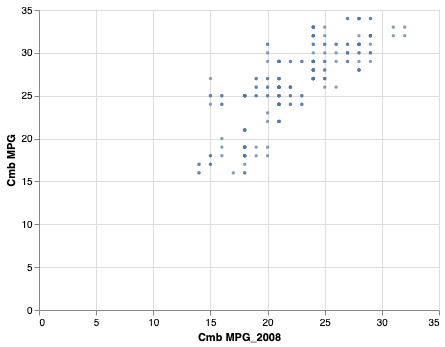

In [206]:
alt.Chart(df_combined_e).mark_circle(size = 10).encode(x = 'Cmb MPG_2008:Q',y ='Cmb MPG:Q' )